<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()) # count nulls

print(df[['JobSat']].describe()) # descriptive statistics for job sat

print(df['JobSat'].value_counts().head(10)) # check most popular values for JobSat

JobSat_mean = df.loc[:, 'JobSat'].mean() # calculate JobSat mean
df['JobSat_mean'] = df['JobSat'].replace(np.nan, JobSat_mean) # replace JobSat nulls with mean

df['RemoteWork'].value_counts(dropna=False) # value counts for Remote Work

df['RemoteWork'] = df['RemoteWork'].fillna('Unknown') # replace RemoteWork nulls with 'Unknown'

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
             JobSat
count  29126.000000
mean       6.935041
std        2.088259
min        0.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       10.000000
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
Name: JobSat, dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [4]:
# Create experience ranges for YearsCodePro (e.g., 0-5, 5-10, 10-20, >20 years)
df["YearsCodePro"].unique()
# Convert YearsCodePro to numeric
df["YearsCodePro_Num"] = df["YearsCodePro"].replace({
    "Less than 1 year": 0,
    "More than 50 years": 51
})

df["YearsCodePro_Num"] = pd.to_numeric(df["YearsCodePro_Num"], errors="coerce")

bins = [-1, 0, 5, 10, 20]
labels = ['0-5', '5-10', '10-20', '20+']

df['ExperienceLevel'] = pd.cut(df['YearsCodePro_Num'], bins=bins, labels=labels)
df['ExperienceLevel']

# create median JobSat =
median_jobsat = (
    df.groupby('ExperienceLevel')['JobSat']
    .median()
    .reset_index()
)

print(median_jobsat)

  ExperienceLevel  JobSat
0             0-5     7.0
1            5-10     7.0
2           10-20     7.0
3             20+     8.0


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


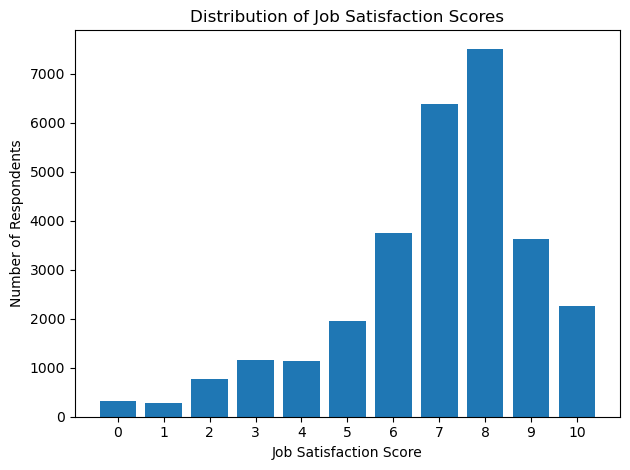

In [5]:
jobsat_counts = df['JobSat'].value_counts().sort_index() # count JobSat values

plt.figure()
plt.bar(jobsat_counts.index, jobsat_counts.values)
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Job Satisfaction Scores')
plt.xticks(np.arange(0, 11, 1))
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


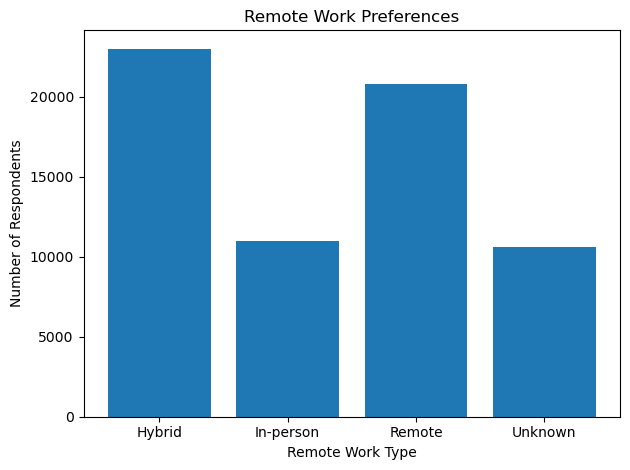

RemoteWork_fixed,Hybrid,In-person,Remote,Unknown
Employment,,,,
"Student, part-time;Retired",0.00,0.00,0.00,100.00
"Student, part-time;Employed, part-time",50.54,32.08,17.38,0.00
"Student, part-time",0.00,0.00,0.00,100.00
"Student, full-time;Student, part-time;Retired",0.00,0.00,0.00,100.00
"Student, full-time;Student, part-time;Employed, part-time",57.14,14.29,28.57,0.00
...,...,...,...,...
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0.00,100.00,0.00,0.00
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",43.48,9.24,47.28,0.00
"Employed, full-time;Independent contractor, freelancer, or self-employed",37.39,10.29,52.32,0.00


In [6]:
# count plot to show remote work distribution
# rename 'Hybrid (some remote, some in-person)'
df['RemoteWork_fixed'] = df['RemoteWork'].replace({
    'Hybrid (some remote, some in-person)':
        'Hybrid'
    })

remotework_counts = df['RemoteWork_fixed'].value_counts().sort_index() # count JobSat values

plt.figure()
plt.bar(remotework_counts.index, remotework_counts.values)
plt.xlabel('Remote Work Type')
plt.ylabel('Number of Respondents')
plt.title('Remote Work Preferences')
plt.tight_layout()
plt.show()

# cross-tabulate remote work preferences by employment type
role_remote_pct = (
    pd.crosstab(
        df['Employment'],
        df['RemoteWork_fixed'],
        normalize='index'
    )
    .mul(100)
    .round(2)
    .sort_values(by='Employment', ascending=False)
)

role_remote_pct

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


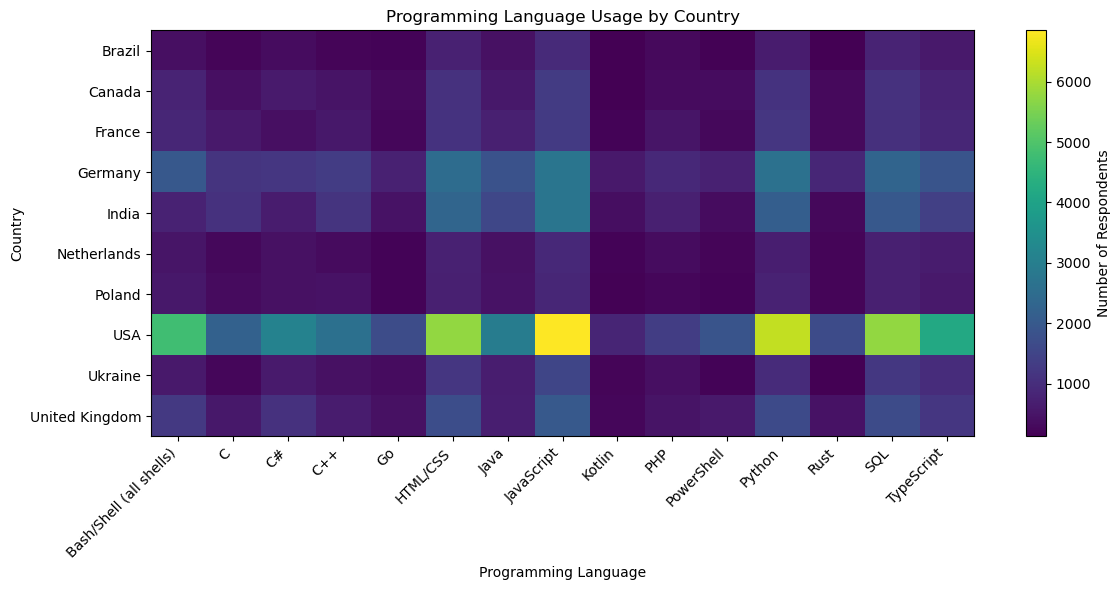

In [7]:
# popularity of programming languages by region
# Select relevant columns and drop missing values
lang_df = df[['Country', 'LanguageHaveWorkedWith']].dropna() # remove nulls
top_countries = (
    lang_df['Country']
    .value_counts()
    .head(10)
    .index
    .tolist()
)
lang_df = lang_df[lang_df['Country'].isin(top_countries)].copy() # restrict dataset to top 10 countries

# rename 'United Kingdom of Great Britain and Northern Ireland'
lang_df['Country'] = lang_df['Country'].replace({
    'United Kingdom of Great Britain and Northern Ireland':
        'United Kingdom',
    'United States of America':
        'USA'
})

lang_df['LanguageHaveWorkedWith'] = lang_df['LanguageHaveWorkedWith'].str.split(';')  # split languages into list
lang_exploded = lang_df.explode('LanguageHaveWorkedWith') # explode into separate rows
top_languages = (
    lang_exploded['LanguageHaveWorkedWith']
    .value_counts()
    .head(15)
    .index
    .tolist()
)

lang_exploded = lang_exploded[lang_exploded['LanguageHaveWorkedWith'].isin(top_languages)].copy() # restrict dataset to top 15 languages
lang_count = lang_exploded.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count') # add count
heatmap_df = lang_exploded.groupby(['Country', 'LanguageHaveWorkedWith']).size().unstack(fill_value=0) # pivot table

# create heatmap
plt.figure(figsize=(12, 6))
plt.imshow(heatmap_df, aspect='auto')
plt.colorbar(label='Number of Respondents')

plt.xticks(
    ticks=range(len(heatmap_df.columns)),
    labels=heatmap_df.columns,
    rotation=45,
    ha='right'
)

plt.yticks(
    ticks=range(len(heatmap_df.index)),
    labels=heatmap_df.index
)

plt.title('Programming Language Usage by Country')
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


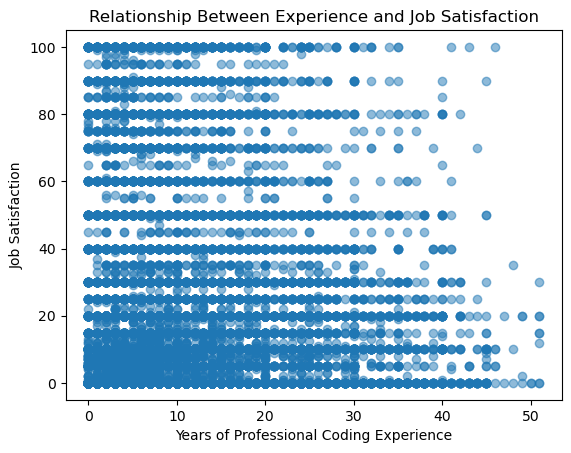

In [8]:
df_scatter = df[['YearsCodePro', 'JobSatPoints_1']].dropna() # drop nulls
df_scatter['YearsCodePro_clean'] = pd.to_numeric(
    df_scatter['YearsCodePro'].replace({
        'Less than 1 year':
            0,
        'More than 50 years':
            51
    }),
    errors='coerce'
)

# create scatter plot
plt.figure()
plt.scatter(
    df_scatter['YearsCodePro_clean'],
    df_scatter['JobSatPoints_1'],
    alpha=0.5
)

plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction')
plt.title('Relationship Between Experience and Job Satisfaction')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


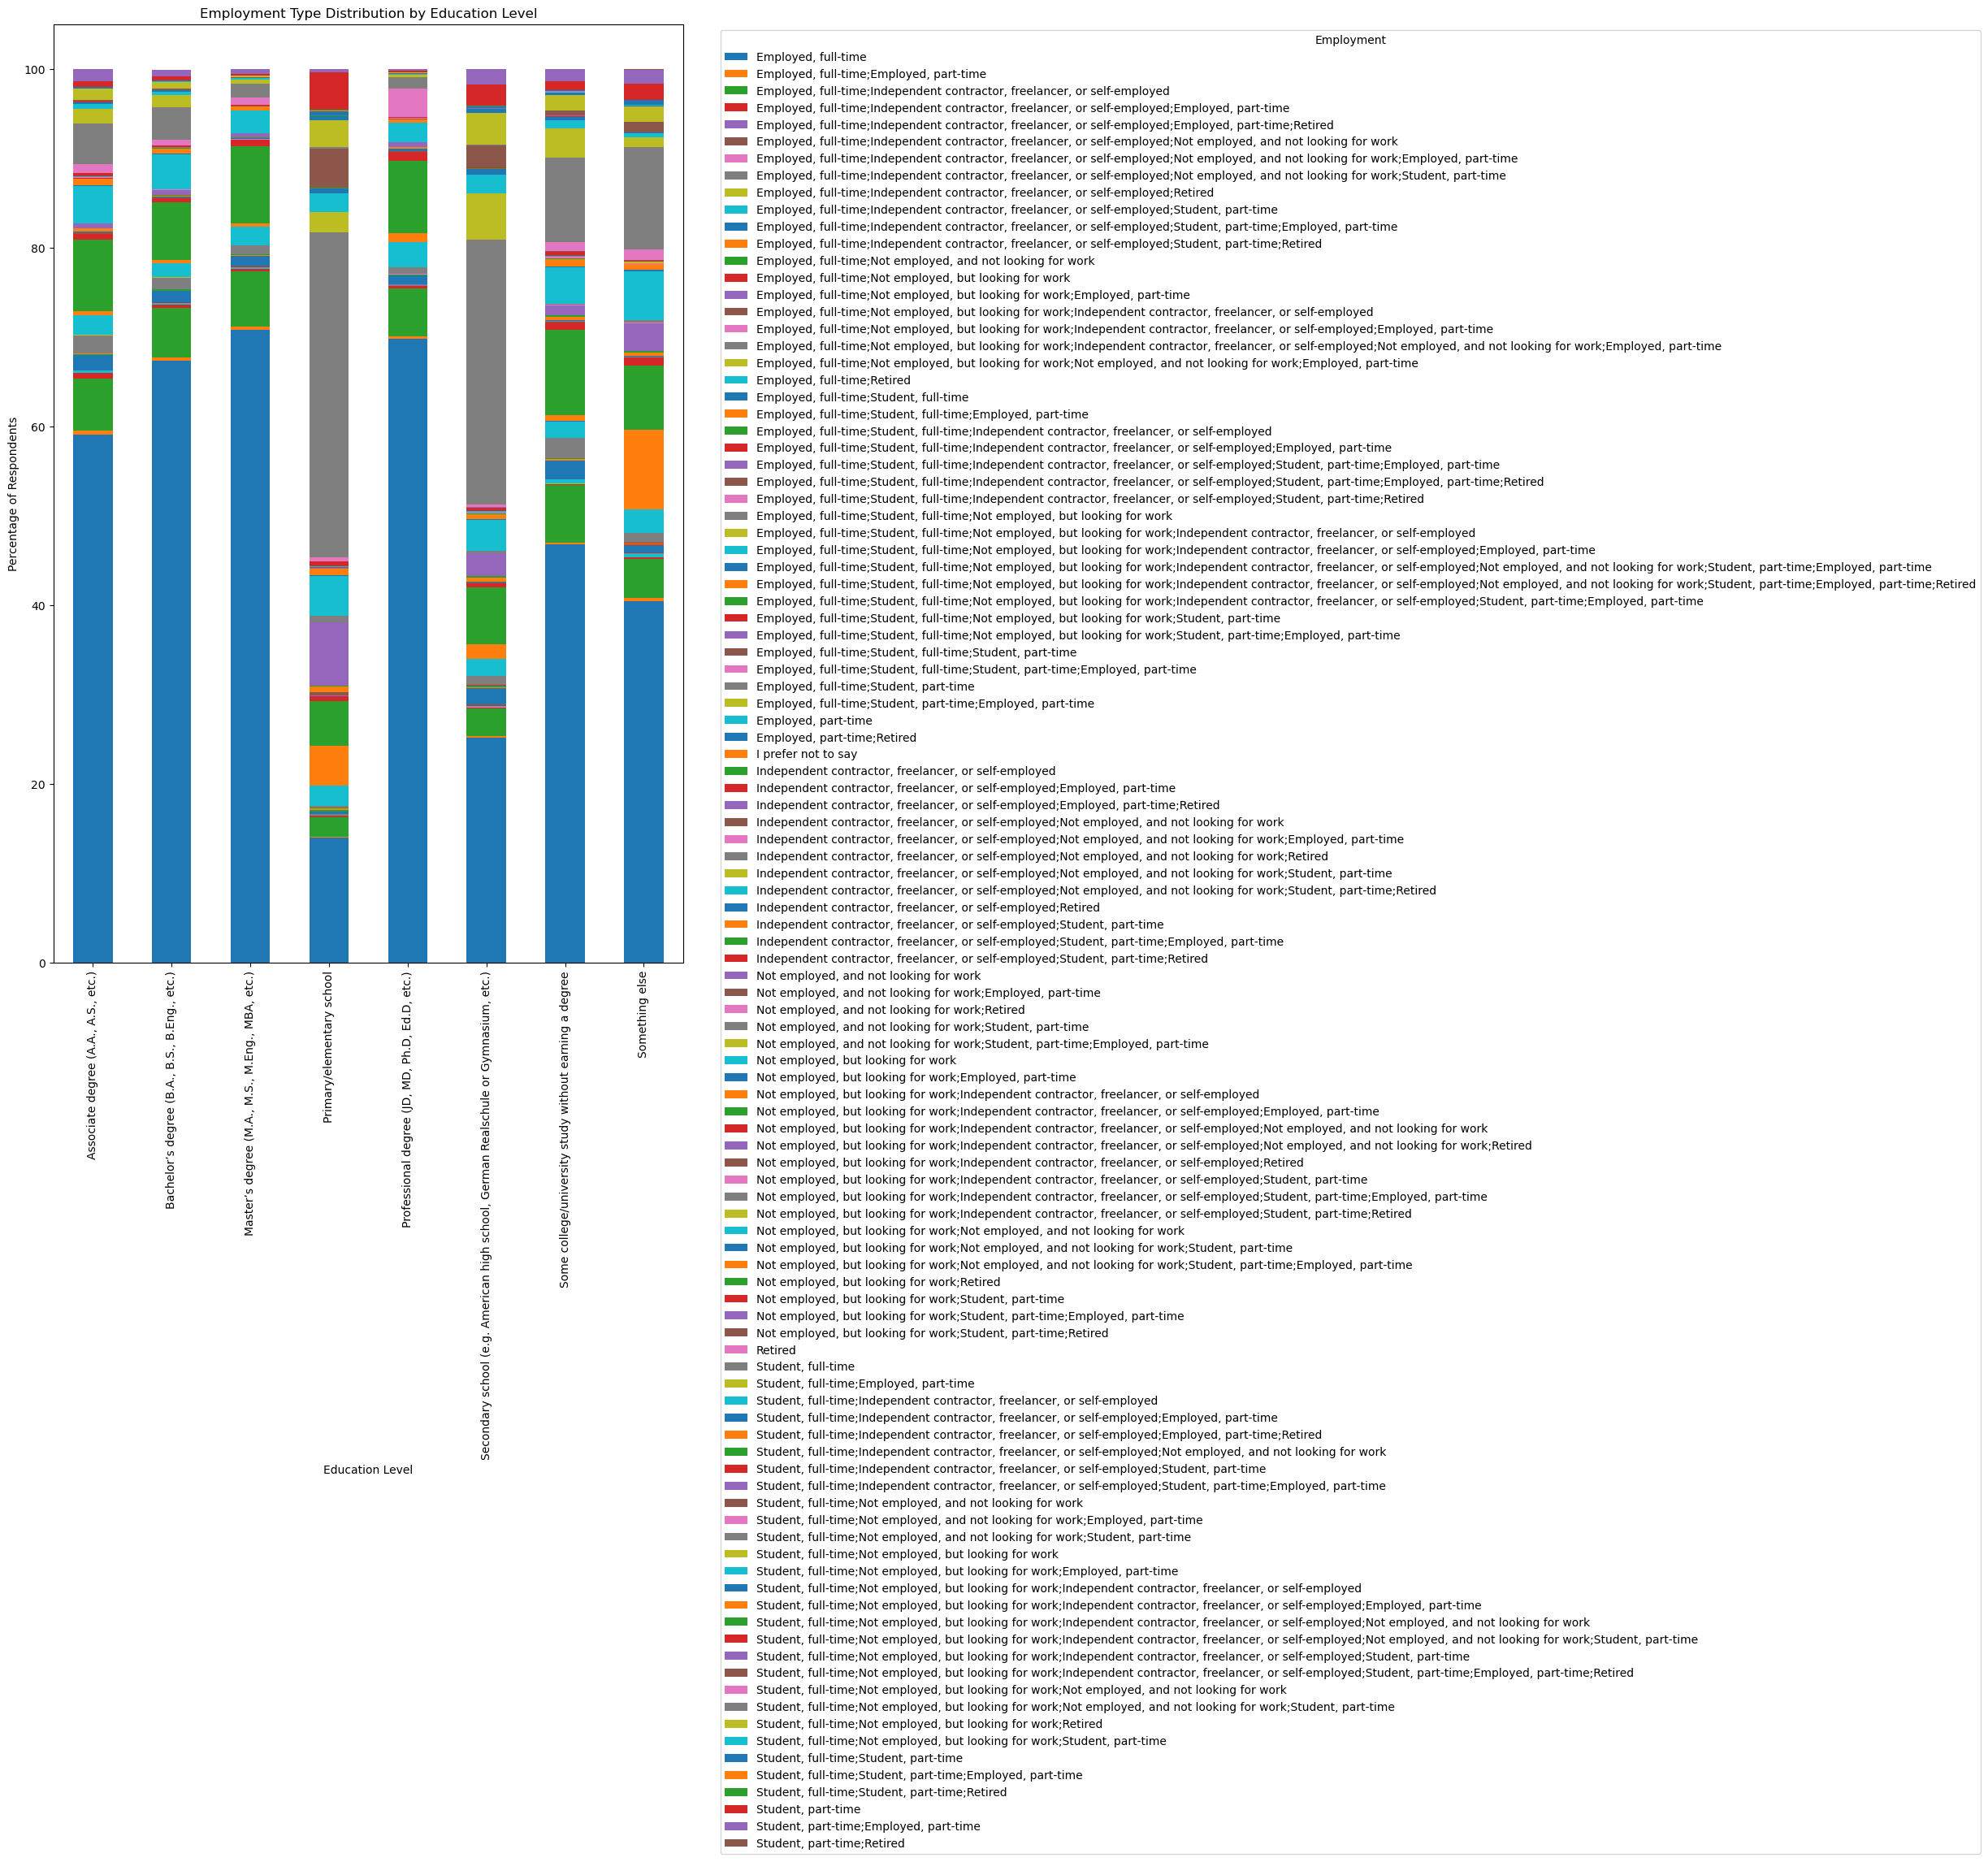

In [9]:
df_edu_emp = df[['EdLevel', 'Employment']].dropna() # remove nulls

#cross tabulation
edu_emp_pct = (
    pd.crosstab(
        df_edu_emp['EdLevel'],
        df_edu_emp['Employment'],
        normalize='index'
    )
    .mul(100)
    .round(2)
)

edu_emp_pct

# stacked bar
edu_emp_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 15)
)

plt.xlabel('Education Level')
plt.ylabel('Percentage of Respondents')
plt.title('Employment Type Distribution by Education Level')
plt.legend(title='Employment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [10]:
df.to_csv('modified_survey_data.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
